In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

,5 Minutes,Lane 1 Flow (Veh/5 Minutes),Lane 2 Flow (Veh/5 Minutes),Flow (Veh/5 Minutes),# Lane Points,% Observed,time
0,2018-11-01 00:00:00,29,26,55,2,0,0.0
1,2018-11-01 00:05:00,30,27,57,2,0,300.0
2,2018-11-01 00:10:00,29,26,55,2,0,600.0
3,2018-11-01 00:15:00,8,11,19,2,100,900.0
4,2018-11-01 00:20:00,3,9,12,2,100,1200.0


,5 Minutes,Lane 1 Flow (Veh/5 Minutes),Lane 2 Flow (Veh/5 Minutes),Flow (Veh/5 Minutes),# Lane Points,% Observed,time
0,2018-11-08 00:00:00,4,11,15,2,100,0.0
1,2018-11-08 00:05:00,1,6,7,2,100,300.0
2,2018-11-08 00:10:00,2,15,17,2,100,600.0
3,2018-11-08 00:15:00,4,8,12,2,100,900.0
4,2018-11-08 00:20:00,3,7,10,2,100,1200.0


,5 Minutes,Lane 1 Flow (Veh/5 Minutes),Lane 2 Flow (Veh/5 Minutes),Flow (Veh/5 Minutes),# Lane Points,% Observed,time
0,2018-11-08 00:00:00,3,3,6,2,100,0.0
1,2018-11-08 00:05:00,2,5,7,2,100,300.0
2,2018-11-08 00:10:00,1,4,5,2,100,600.0
3,2018-11-08 00:15:00,2,3,5,2,100,900.0
4,2018-11-08 00:20:00,1,4,5,2,100,1200.0


,Hour,Lane 1 Flow (Veh/Hour),Lane 2 Flow (Veh/Hour),Flow (Veh/Hour),# Lane Points,% Observed,hour
0,2018-11-01 00:00:00,110,148,258,24,75,0.0
1,2018-11-01 01:00:00,27,74,101,24,100,1.0
2,2018-11-01 02:00:00,37,81,118,24,100,2.0
3,2018-11-01 03:00:00,30,90,120,24,100,3.0
4,2018-11-01 04:00:00,78,129,207,24,100,4.0


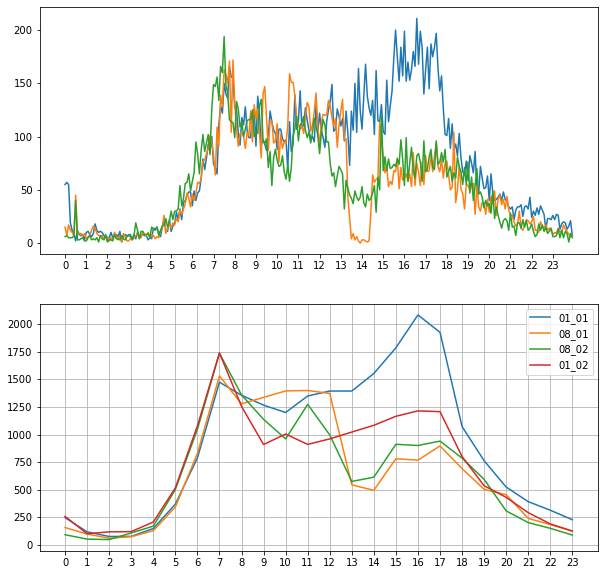

In [33]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))
for date_dir in ['01_01', '08_01', '08_02']:
    validation = pd.read_excel('paradise_11_{}/pems_flow_11_{}.xlsx'.format(date_dir, date_dir))
    if date_dir[0:2] =='01': ref_date='2018-11-01T00:00:00'
    if date_dir[0:2] =='08': ref_date='2018-11-08T00:00:00'
    validation['time'] = validation['5 Minutes'] - np.datetime64(ref_date)
    validation['time'] = validation['time'].dt.total_seconds()
    display(validation.head())
    
    ax[0].plot(validation['time']/3600, validation['Flow (Veh/5 Minutes)'], label=date_dir)
    ax[0].set_xticks(list(range(24)))
    
    validation_hr = validation.copy()
    validation_hr['hour'] = validation_hr['time']//3600
    validation_hr = validation_hr.groupby('hour').agg({'Flow (Veh/5 Minutes)': np.sum}).reset_index()

    ax[1].plot(validation_hr['hour'], validation_hr['Flow (Veh/5 Minutes)'], label=date_dir)
    ax[1].set_xticks(list(range(24)))
    
for date_dir in ['01_02']:
    validation = pd.read_excel('paradise_11_{}/pems_flow_11_{}.xlsx'.format(date_dir, date_dir))
    if date_dir[0:2] =='01': ref_date='2018-11-01T00:00:00'
    if date_dir[0:2] =='08': ref_date='2018-11-08T00:00:00'
    validation['hour'] = validation['Hour'] - np.datetime64(ref_date)
    validation['hour'] = validation['hour'].dt.total_seconds()/3600
    display(validation.head())

    validation_hr = validation.copy()
    ax[1].plot(validation_hr['hour'], validation_hr['Flow (Veh/Hour)'], label=date_dir)
    ax[1].set_xticks(list(range(24)))
    plt.legend()
    plt.grid()
    plt.show()